## K-means Elbow and Silhoutte Graphs
---
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares

- Produce Elbow and Silhoutte Coefficient Plots for cluster ranging from 2 to 9.

- Apply Standard Scaling

- Drop ID Column



### Import Libraries
---

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Preparing & Exploring Data

In [2]:
data = pd.read_csv("../data/customer.csv", sep=",") #Reading data
print("Length of data= ",len(data))
print("Shape of data= ",data.shape)
data.head(10)

Length of data=  60
Shape of data=  (60, 5)


,ID,Visit.Time,Average.Expense,Sex,Age
0,1,3,5.7,0,10
1,2,5,14.5,0,27
2,3,16,33.5,0,32
3,4,5,15.9,0,30
4,5,16,24.9,0,23
5,6,3,12.0,0,15
6,7,12,28.5,0,33
7,8,14,18.8,0,27
8,9,6,23.8,0,16
9,10,3,5.3,0,11


In [3]:
#Drop "Date" Column
data = data.drop(['ID'], axis=1) 
print("Shape of data after drop ID column= ",   data.shape)

Shape of data after drop ID column=  (60, 4)


In [4]:
# Get features
features=data.iloc[:,:4]
features.head()

# Scale features by using StandardScaler Method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)

###  Function

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def problem2(features):
    """
    Input:
        
        X : Features
        
        
    Returns:
    
        inertia_list : Sum of squared distances of samples to their closest cluster center.
        silhouette_score_list  : Silhouette Coefficient of all samples.
        
    """
    km=KMeans(n_clusters=4) # Create K-means object with 4 cluster

    # Create two list to keep results
    inertia_list=[] 
    silhouette_score_list=[]
    
    for i in range(2,10): #2-9 cluster
        k_means=KMeans(n_clusters=i,n_init=10) #K-means object
        k_means.fit(features) #Train
        inertia_list.append(k_means.inertia_) #Inertia Scores
        silhouette_score_list.append(silhouette_score(features,k_means.labels_)) # silhouette coefficients
        
    return inertia_list, silhouette_score_list

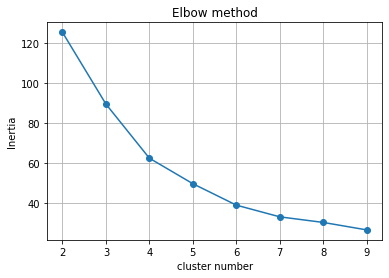

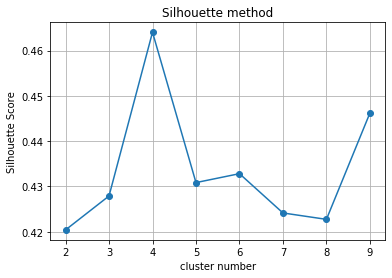

In [6]:
#Call problem2 function
inertia_list, silhouette_score_list=  problem2(features)

#Drawing Elbow and Silhouette graphs
cluster_numbers=np.arange(2,10)
plt.plot(cluster_numbers,inertia_list,"o-")
plt.xlabel("cluster number")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.grid(True)
plt.show()

plt.plot(cluster_numbers,silhouette_score_list,"o-")
plt.xlabel("cluster number")
plt.ylabel("Silhouette Score")
plt.title("Silhouette method")
plt.grid(True)
plt.show()